In [1]:
# pip install pyautogui



In [2]:
from mne_realtime import LSLClient, MockLSLStream
import pylsl as lsl
import matplotlib.pyplot as plt

import time
from scipy.signal import wiener
from scipy.signal import welch

import numpy as np

In [3]:
#find host id
streams = lsl.resolve_streams(wait_time=min(0.1, 3))

for stream_info in streams:
            print(stream_info.source_id())
###########



INSIGHT2-A3D20043


In [4]:

host= 'INSIGHT2-A3D20043'
wait_max=5
client = LSLClient( info=None,host=host, wait_max=wait_max)
client.start()

   

Client: Waiting for server to start
Looking for LSL stream INSIGHT2-A3D20043...
Found stream 'EmotivDataStream-EEG' via INSIGHT2-A3D20043...
Client: Connected


In [5]:

import pyautogui
print(pyautogui.size())
pyautogui.moveTo(100, 100, duration = .5)
pyautogui.moveRel(0, 50, duration = 1)
print(pyautogui.position())
pyautogui.click(100, 100)
pyautogui.dragRel(100, 0, duration = 1)
pyautogui.scroll(200)
pyautogui.typewrite("hello Geeks !")
pyautogui.typewrite(["a", "left", "ctrlleft"])

pyautogui.click(clicks=2)  # double-click the left mouse button
pyautogui.click(clicks=2, interval=0.25)  # double-click the left mouse button, but with a quarter second pause in between clicks
pyautogui.click(button='right', clicks=3, interval=0.25) 

Size(width=1920, height=1080)
Point(x=142, y=201)


In [6]:
time.sleep(3)
pyautogui.typewrite(["ctrlv"])
pyautogui.typewrite(["a", "left", "ctrlright"])

In [ ]:
apyautogui.typewrite(["ctrlv"])a

<IPython.core.display.Javascript object>


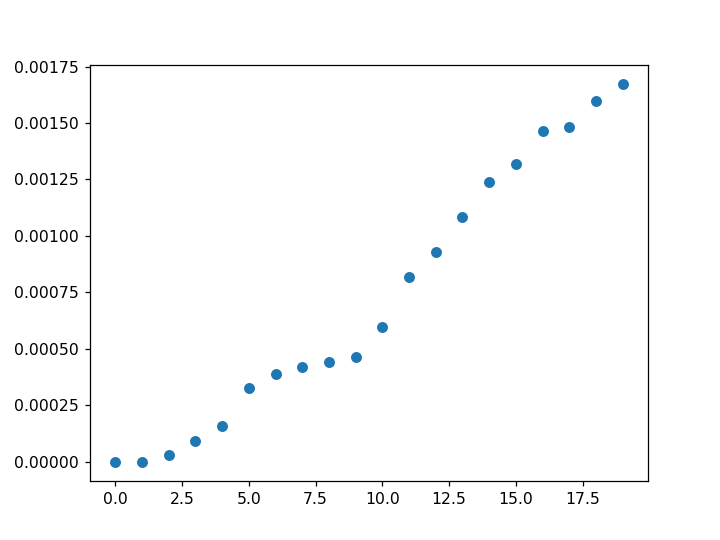

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
(65,) (1, 1, 65)
Not setting metadata
1 m

In [18]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

xx=[]
y1=[]
y2=[]
Mov_Avg=[]
prev_time=time.time()
sfreq=128
info={'sfreq':128}
n_epochs=20

for ii in range(n_epochs):
    time.sleep(0)
    
    epoch = client.get_data_as_epoch(n_samples=sfreq,picks=[3,4,5,6,7]);
    data = epoch.get_data();
#     print(data.shape, np.mean(data))
    
    data = wiener(data, (1,1, 40));
    plt.plot(data[0,1,:])
    chnls1=[1]
    X0Band=Bandwidth(data[:,chnls1,:]);
    
    a= X0Band[0,0,2]
    b= X0Band[0,0,3]
    
    xx.append(ii)
    y1.append(a)
    y2.append(b)
    
    l1=min(ii,20)
    l2=1
    window_size=20
    this_window = y1[-l1:-l2]
    window_average = sum(this_window) / window_size
    Mov_Avg.append(window_average)
    meanMov_Avg=mean(Mov_Avg)
    ax.clear()
    ax.scatter(xx,Mov_Avg)
    fig.canvas.draw()
    
    if time.time()-prev_time>.5:
        prev_time=time.time()
        
#         pyautogui.moveRel(0, -int((window_average-0.004)*50000), duration = .5)
        
        if window_average>meanMov_Avg:
               pyautogui.click(button='right', clicks=1) 
        

#         m.move(400,400+int((window_average)*100000))
#         m.click(500, 300, 1)
#         m.screen_size()
#         m.position()
     
    
    
    
    



In [ ]:
window_average

In [11]:
### Functions For Features

from scipy import stats


def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)

def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data)),axis=-1)

###########################################################

def Bandwidth(data):
  sf=128

  win = int(2 * sf)  # Window size is set to 4 seconds
  freqs, psd = welch(data, sf, nperseg=data.shape[2])  # Works with single or multi-channel data... average='median'
  print(freqs.shape, psd.shape)  # psd has shape (n_channels, n_frequencies)

  psdsum= np.sum(psd, axis=-1, keepdims=True)
  psd=psd/psdsum

  FREQ_BANDS = {"delta": [0.5, 4.5],
                "theta": [4.5, 8.5],
                "alpha": [8.5, 11.5],
                "sigma": [11.5, 15.5],
                "beta":   [15.5, 30] }


  XallBand=np.empty([psd.shape[0],psd.shape[1],len(FREQ_BANDS)])
  i=0
  for fmin, fmax in FREQ_BANDS.values():
      psds_band = psd[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
      psds_band = psds_band.reshape([psd.shape[0],psd.shape[1],1])
      XallBand[:,:,i] = psds_band[:,:,0]
      i+=1
      # print(psds_band.shape)

  # print(freqs.shape, psdsum.shape,X[2].shape)  # psd has shape (n_channels, n_frequencies)

  # # Plot
  # sns.set(style='white', font_scale=1.2)

  # plt.plot(freqs, psd[1,1], 'k', lw=2)
  # plt.fill_between(freqs, psd[1,1], cmap='Spectral')
  # plt.xlim(0, 50)
  # plt.yscale('log')
  # sns.despine()
  # # plt.title(chan[1])
  # plt.xlabel('Frequency [Hz]')
  # plt.ylabel('PSD log($uV^2$/Hz)');

  return XallBand

  # Cross Correlation

def crossCorrelation(eegData, i, j):
    out = np.zeros(eegData.shape[0])
    for epoch in range(eegData.shape[0]):
        ccor = np.correlate(eegData[epoch,i,:], eegData[epoch,j,:], mode="full")
        absccor = np.abs(ccor)
        out[epoch] = (np.max(absccor) - np.mean(absccor)) / np.std(absccor)
    return out
